In [1]:
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [4]:
from nltk.stem import PorterStemmer

In [5]:
from nltk.stem import WordNetLemmatizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.model_selection import train_test_split

In [7]:
from keras.preprocessing.text import Tokenizer

In [8]:
from keras.preprocessing.sequence import pad_sequences

In [9]:
from keras import regularizers

In [10]:
from keras.layers import Embedding

In [12]:
from keras.layers import Dropout

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K

In [ ]:
from keras.callbacks import ModelCheckpoint

In [13]:
import numpy as np

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
from sklearn.metrics import classification_report

In [18]:
from sklearn.utils.multiclass import unique_labels

In [20]:
from sklearn.metrics import plot_confusion_matrix

In [22]:
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

In [2]:
df1= pd.read_csv('C:\\Users\\ARUNIMA DAS\\Desktop\\pythonP\\Twitter_Data.csv')

In [3]:
df1

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [4]:
df1.dropna(inplace= True, how= 'any' , axis=0)
len(df1)

162969

In [ ]:
opinion=[]
for i in df1.category:
    if(i <0 ):
        opinion.append('Negative')
    elif (i > 0):
        opinion.append('Positive')
    else:
         opinion.append('Nutral')


In [ ]:
opinion

In [ ]:
df1['Opinion']= opinion

In [ ]:
df1.to_csv('training_data.csv', index= False)

In [ ]:
df1['Opinion'].value_counts().sort_index().plot.bar()

In [2]:
df2= pd.read_csv('C:\\Users\\ARUNIMA DAS\\Desktop\\pythonP\\training_data.csv')

In [4]:
df2[['clean_text','Opinion']].head(5)

,clean_text,Opinion
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Nutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


In [13]:
df2.clean_text[4]

'answer who among these the most powerful world leader today trump putin modi may '

In [22]:
sent_list=[]
word_list=[]
text_list= list(df2.clean_text)
for i in range(len(text_list)):
    #Sentence Tokenization
    
   # sent_list.append(sent_tokenize(text_list[i]))
    #print(sent_list[i])
   
    #word Tokenization
    
    word_list.append(word_tokenize(text_list[i]))
    #print(word_list[i])

#df2['Sentence']= sent_list
#df2['word']= word_list

In [ ]:
word_list

In [17]:
word_list= list(df2.word)

In [21]:
for i in range(len(word_list)):
    word_list[i]= word_list[i].split(',')

In [28]:

for i in range(len(word_list)):
    for words in word_list[i]:
        #print(words)
        if words in ENGLISH_STOP_WORDS:
            print(words)
            word_list[i].remove(words)
            #print(word_list[i])

In [85]:
len(word_list)

162969

In [ ]:
for i in range(len(word_list)):
    for words in word_list[i]:
        if(len(words)==1 or words.isdigit()):
            print(words)
            word_list[i].remove(words)
            #print(word_list[i])

In [34]:
for i in range(len(word_list)):
    
    for word in word_list[i]:
        if not word.isalpha():
            print(word)
            word_list[i].remove(word)

In [35]:
pstemmer = PorterStemmer()
lemma = WordNetLemmatizer()
for strs in word_list:
    #Stemming
    for i in range(0, len(strs)):
        strs[i]=pstemmer.stem(strs[i])
        
     #Lemmatizing
    for i in range(0,len(strs)):
        strs[i]=lemma.lemmatize(strs[i], pos='a')     

In [36]:
df2['word']= word_list

In [37]:
df2.to_csv('training_data.csv', index= False)

In [26]:
df3= pd.read_csv('C:\\Users\\ARUNIMA DAS\\Desktop\\pythonP\\training_data.csv')

# Tokenization

In [27]:
word= list(df3.word)

In [42]:
vec = CountVectorizer()
X = vec.fit_transform(word)
#print(X.toarray())

In [24]:
import numpy

In [ ]:
print(vec.get_feature_names())


In [ ]:
print(vec.vocabulary_)

In [45]:
print(len(vec.get_feature_names()))

81286


In [28]:
max_words= 10000
max_len= 50
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(word)
sequences = tokenizer.texts_to_sequences(word)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ... 2847 2474 1006]
 [   0    0    0 ...  647    8    1]
 [   0    0    0 ...    1   19 2407]
 ...
 [   0    0    0 ... 1074 3972  309]
 [   0    0    0 ...  281   82  458]
 [   0    0    0 ...  273  285  114]]


In [22]:
tweets.shape

(162969, 50)

In [29]:
embedding_layer = Embedding(10000, 128)


In [30]:
embedding_layer

In [31]:
y= list(df3.category)
#y= np.array(y)
for i in range(len(y)):
    if(y[i]==-1):
        y[i]= [1,0,0]
    elif(y[i]==0):
        y[i]= [0,1,0]
    else:
        y[i]= [0,0,1]
#z = np.array([[1,0,0] if i == -1  else [0,0,1] for i in y])

In [32]:

y= np.array(y)

In [33]:
y.shape

(162969, 3)

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(tweets, y, shuffle = True, train_size = 0.8)


In [35]:
Xtest

array([[   0,    0,    0, ..., 1442,   95,  510],
       [   0,    0,    0, ...,    8, 2052,    3],
       [   0,    0,    0, ...,  250,   85,  560],
       ...,
       [   0,    0,    0, ...,    2,   63,   80],
       [   0,    0,    0, ...,  690,  135, 4421],
       [   0,    0,    0, ...,   29,  486, 8996]])

In [36]:
ytest.shape

(32594, 3)

In [37]:
y_test= list(ytest)

# Creating Model

In [38]:
model1 = Sequential()
model1.add(layers.Embedding(10000, 128)) #The embedding layer
model1.add(Dropout(0.4))
model1.add(layers.LSTM(128,dropout=0.2, return_sequences= True, recurrent_dropout= 0.2)) #Our LSTM layer
model1.add(layers.LSTM(128, return_sequences=True, recurrent_dropout= 0.4, dropout= 0.5))# returns a sequence of vectors of dimension 32
model1.add(Dropout(0.3))
model1.add(layers.LSTM(128, return_sequences=True, recurrent_dropout= 0.4, dropout= 0.3))
model1.add(layers.LSTM(128)) 
model1.add(layers.Dense(3,activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         1280000   
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 lstm (LSTM)                 (None, None, 128)         131584    
                                                                 
 lstm_1 (LSTM)               (None, None, 128)         131584    
                                                                 
 dropout_1 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_2 (LSTM)               (None, None, 128)         131584    
                                                                 
 lstm_3 (LSTM)               (None, 128)               1

In [39]:
#model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)

In [41]:
history=model1.fit(Xtrain, ytrain, epochs=5, validation_data=(Xtest, ytest),callbacks=[checkpoint1],batch_size= 32)

Epoch 1/5
4075/4075 [==============================] - ETA: 0s - loss: 0.5676 - accuracy: 0.7804
Epoch 1: val_accuracy improved from -inf to 0.82098, saving model to best_model1.hdf5
4075/4075 [==============================] - 1127s 274ms/step - loss: 0.5676 - accuracy: 0.7804 - val_loss: 0.4910 - val_accuracy: 0.8210
Epoch 2/5
4075/4075 [==============================] - ETA: 0s - loss: 0.4776 - accuracy: 0.8223
Epoch 2: val_accuracy improved from 0.82098 to 0.82310, saving model to best_model1.hdf5
4075/4075 [==============================] - 1058s 260ms/step - loss: 0.4776 - accuracy: 0.8223 - val_loss: 0.4739 - val_accuracy: 0.8231
Epoch 3/5
4075/4075 [==============================] - ETA: 0s - loss: 0.4492 - accuracy: 0.8335
Epoch 3: val_accuracy did not improve from 0.82310
4075/4075 [==============================] - 964s 237ms/step - loss: 0.4492 - accuracy: 0.8335 - val_loss: 0.4824 - val_accuracy: 0.8204
Epoch 4/5
4075/4075 [==============================] - ETA: 0s - loss:

In [31]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [36]:
acc = model1.evaluate(Xtest, ytest)

1019/1019 [==============================] - 38s 37ms/step - loss: 0.5014 - accuracy: 0.8179


In [69]:
y_pred= model1.predict(Xtest)

In [70]:
y_pred

array([[0.01807267, 0.9196331 , 0.06229423],
       [0.8914975 , 0.06852815, 0.03997442],
       [0.00536   , 0.00155605, 0.99308395],
       ...,
       [0.9743337 , 0.01275603, 0.01291029],
       [0.02305605, 0.02424828, 0.95269567],
       [0.00606537, 0.00393457, 0.99000007]], dtype=float32)

## Summary of accuray

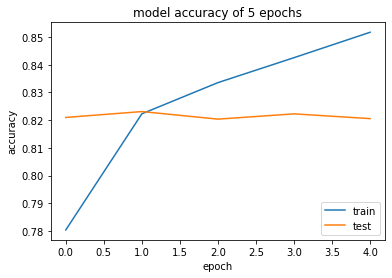

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of 5 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

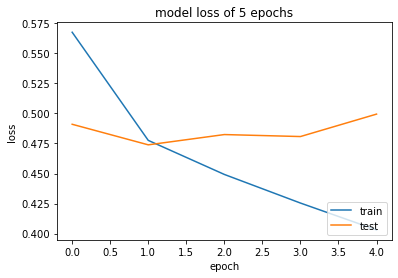

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss of 5 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [71]:
pred_y=[]
for pred in y_pred:
    if np.argmax(pred)==2:
        pred_y.append(1)
    elif np.argmax(pred)==1:
           pred_y.append(0)
    else:
        pred_y.append(-1)

In [73]:
y_test=[]
for it in ytest:
    if np.argmax(it)==2:
        y_test.append(1)
       # print("pos")
    elif np.argmax(it)==1:
            y_test.append(0)
            #print("ne")
    else:
        y_test.append(-1)
       #print("neg")

In [113]:
ytest

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [ 0,  0,  0],
       ...,
       [-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

In [86]:
cm= confusion_matrix(y_test, pred_y)  

In [97]:
cm

array([[ 5348,   601,  1108],
       [  524,  9233,  1328],
       [ 1028,  1346, 12078]], dtype=int64)

In [99]:
unique_labels(y_test)

array([-1,  0,  1])

In [110]:
def plot1(ytrue, ypred):
    labels= unique_labels(y_test)
    column= ['Negative','Neutral','Positive']
    indices=['Negative','Neutral','Positive']
    table= pd.DataFrame(confusion_matrix(ytrue,ypred),columns= column, 
                        index= indices)
    return table

In [111]:
plot1(y_test, pred_y)

,Negative,Neutral,Positive
Negative,5348,601,1108
Neutral,524,9233,1328
Positive,1028,1346,12078


In [112]:
def plot2(ytrue, ypred):
    labels= unique_labels(y_test)
    column= ['Negative','Neutral','Positive']
    indices=['Negative','Neutral','Positive']
    table= pd.DataFrame(confusion_matrix(ytrue,ypred),columns= column, 
                        index= indices)
    return sns.heatmap(table,annot= True, fmt='d')


Text(0.5, 1.0, 'Confusion Matrix with labels\n\n')

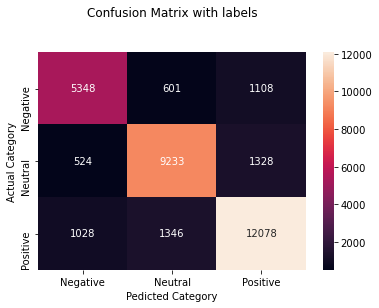

In [113]:
pl= plot2(y_test,pred_y)
pl.set_xlabel('Pedicted Category')
pl.set_ylabel('Actual Category')
pl.set_title('Confusion Matrix with labels\n\n')

In [118]:
def plot3(ytrue, ypred):
    labels= unique_labels(y_test)
    column= ['Negative','Neutral','Positive']
    indices=['Negative','Neutral','Positive']
    cm= confusion_matrix(ytrue,ypred)
    table= pd.DataFrame(cm/np.sum(cm),columns= column, 
                        index= indices)
    return sns.heatmap(table,annot= True, fmt='.2%')

Text(0.5, 1.0, 'Confusion Matrix for percentages with labels\n\n')

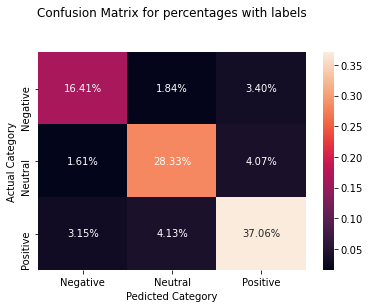

In [120]:
pl= plot3(y_test,pred_y)
pl.set_xlabel('Pedicted Category')
pl.set_ylabel('Actual Category')
pl.set_title('Confusion Matrix for percentages with labels\n\n')

In [77]:
print(classification_report(y_test,pred_y, labels=[1,0,-1]))

              precision    recall  f1-score   support

           1       0.83      0.84      0.83     14452
           0       0.83      0.83      0.83     11085
          -1       0.78      0.76      0.77      7057

    accuracy                           0.82     32594
   macro avg       0.81      0.81      0.81     32594
weighted avg       0.82      0.82      0.82     32594



In [78]:
print("%.2f" % round(precision_score(y_test,pred_y, average='weighted'),2))


0.82


In [79]:
print("%.2f" % round(recall_score(y_test,pred_y, average='weighted'),2))

0.82


In [80]:
print("%.2f" % round(f1_score(y_test,pred_y, average='weighted'),2))

0.82


# Testing Data

In [43]:
df4= pd.read_csv('C:\\Users\\ARUNIMA DAS\\Desktop\\pythonP\\Reddit_Data.csv')

In [44]:
word=list(df4.word)

In [45]:
max_words= 3000
max_len= 50
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(word)
sequences = tokenizer.texts_to_sequences(word)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   13 1320  939]
 [ 156  615   83 ...    2 1028 1151]
 [   0    0    0 ...    8 1473  473]
 ...
 [   0    0    0 ... 1541 1303  862]
 [   0    0    0 ...    0 1289  315]
 [   0    0    0 ...   31    4  618]]


In [46]:
tweets.shape

(37149, 50)

In [47]:
embedding_layer = Embedding(3000, 256)

In [48]:
y= list(df4.category)
#y= np.array(y)
for i in range(len(y)):
    if(y[i]==-1):
        y[i]= [1,0,0]
    elif(y[i]==0):
        y[i]= [0,1,0]
    else:
        y[i]= [0,0,1]

In [49]:
y= np.array(y)

In [50]:
x1test= tweets

In [51]:
y1test= y

In [52]:
acc = model1.predict(x1test)

In [53]:
prediction=[]
for predc in acc:
    if np.argmax(predc)==2:
        prediction.append(1)
    elif np.argmax(predc)==1:
            prediction.append(0)
    else:
          prediction.append(-1)

In [46]:
len(prediction)

37149

In [54]:
cat= list(df4.category)

# Comparing Realing labels with predicted labels

In [55]:
real_pos=0
real_nau=0
real_nev=0
for i in cat:
    if(i==1):
        real_pos+=1
    elif(i==0):
        real_nau+=1
    else:
        real_nev+=1

In [56]:
pos=0
nau=0
nev=0
for predc in acc:
    if np.argmax(predc)==2:
        pos+=1
    elif np.argmax(predc)==1:
        nau+=1
    else:
        nev+=1

In [57]:
print('Number of predicted positive value',pos)
print('Real positive value',real_pos)

Number of predicted positive value 14390
Real positive value 15830


In [58]:
print('Number of predicted nautral value',nau)
print('Real nautral value',real_nau)

Number of predicted nautral value 16814
Real nautral value 13042


In [59]:
print('Number of predicted negative value',nev)
print('Real negative value',real_nev)

Number of predicted negative value 5945
Real negative value 8277


In [62]:
df4['Prediction']= prediction

In [63]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37149 entries, 0 to 37148
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37149 non-null  int64 
 2   word           37149 non-null  object
 3   Prediction     37149 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [64]:
df4.to_csv('testing_data.csv', index= False)

In [37]:
df5=  pd.read_csv('E:\\pythonP\\imp_final_data.csv')

In [38]:
word= list(df5.nostop)

In [62]:
max(word)

"['тhe', 'children', 'room', 'open', 'close', 'children', 'play', 'floor', 'hallway', 'patron', 'help', 'cryptocurr', 'buy', 'nft', 'grow', 'strong', 'consid', 'donat', 'crypto', 'help', 'nft', 'helpukrain', 'stopputin', 'standwithukrain']"

In [40]:
min(word)

"['aap', 'urg', 'govt', 'overrid', 'right', 'punjab', 'govt', 'chandigarh', 'admn', 'sunni', 'russianarmi', 'noflyzoneua']"

In [41]:
max_words= 5000
max_len= 35
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(word)
sequences = tokenizer.texts_to_sequences(word)
texts = pad_sequences(sequences, maxlen=max_len)
print(texts)

[[  0   0   0 ... 993   4   7]
 [  0   0   0 ...  60  14   8]
 [  0   0   0 ...  92   7 148]
 ...
 [  0   0   0 ...  10  11   1]
 [  0   0   0 ...   0 248  10]
 [  0   0   0 ...  61  33   2]]


In [42]:
pred = model1.predict(texts)

In [66]:
pred

array([[1.17778340e-02, 9.57678676e-01, 3.05435136e-02],
       [9.22176187e-05, 1.29434731e-04, 9.99778330e-01],
       [1.59244820e-01, 3.27628627e-02, 8.07992339e-01],
       ...,
       [1.12657346e-01, 8.48188162e-01, 3.91545109e-02],
       [7.99615588e-03, 9.46560740e-01, 4.54430357e-02],
       [9.78852808e-01, 7.39048049e-03, 1.37567576e-02]], dtype=float32)

In [43]:
prediction=[]
for p in pred:
    if np.argmax(p)==2:
        prediction.append(1)
    elif np.argmax(p)==1:
            prediction.append(0)
    else:
          prediction.append(-1)

In [44]:
positive=0
neutral=0
negative=0
for p in prediction:
    if(p==1):
        positive+=1
    elif(p==-1):
        negative+=1
    else:
        neutral+=1

In [48]:
print(positive)

10531


In [49]:
print(negative)

5040


In [50]:
print(neutral)

8368


In [84]:
df5['Label']= prediction 

In [51]:
df5.shape

(23939, 12)

In [90]:
df5.text[2]

'tears. take a handful of minutes and watch. russianukrainianwar slavaukraini '

In [91]:
df5.to_csv('imp_final_data.csv', index= False)

In [92]:
df5.head(10)

,tweet_id,user_name,user_location,date,text,hashtags,Sentence,word,nostop,Label
0,1.504560e+18,PMESII,Antarctica,2022-03-17 20:42:42+00:00,russian occupants in the homes of ukrainian c...,"['Russian', 'Ukrainian', 'UkraineRussiaWar', '...",[' russian occupants in the homes of ukrainian...,"['russian', 'occup', 'home', 'ukrainian', 'civ...","['russian', 'occup', 'home', 'ukrainian', 'civ...",1
1,1.504560e+18,RED Python (EngD PhD),United States,2022-03-17 20:42:28+00:00,the worst leadership of a country ever ukraine...,"['UkraineRussiaWar', 'UkraineUnderAttack', 'Uk...",['the worst leadership of a country ever ukrai...,"['bad', 'leadership', 'countri', 'ukrainerussi...","['bad', 'leadership', 'countri', 'ukrainerussi...",1
2,1.504560e+18,JimOnLight,"Dallas, TX",2022-03-17 20:42:27+00:00,tears. take a handful of minutes and watch. ru...,"['RussianUkrainianWar', 'SlavaUkraini']","['tears.', 'take a handful of minutes and watc...","['tear', 'hand', 'minut', 'watch', 'russianukr...","['tear', 'hand', 'minut', 'watch', 'russianukr...",0
3,1.504560e+18,Peter Brandt,"Paombong, Central Luzon",2022-03-17 20:41:51+00:00,putin allegedly arrests his own military chief...,"['Ukraine', 'UkraineWar', 'UkraineUnderAttack'...",['putin allegedly arrests his own military chi...,"['putin', 'allegedli', 'arrest', 'militari', '...","['putin', 'allegedli', 'arrest', 'militari', '...",-1
4,1.504560e+18,World news,NaN,2022-03-17 20:41:37+00:00,scenes of destruction left by the russian army...,"['UkraineRussiaWar', 'Mariupol', 'UkraineRussi...",['scenes of destruction left by the russian ar...,"['scene', 'destruct', 'left', 'russian', 'armi...","['scene', 'destruct', 'left', 'russian', 'armi...",0
5,1.504560e+18,Angela Veitch,"Ottawa, Ontario",2022-03-17 20:41:37+00:00,an authentic heartfelt plea to the russian peo...,"['RussianUkrainianWar', 'truth', 'StopTheInvas...",['an authentic heartfelt plea to the russian p...,"['authent', 'heartfelt', 'plea', 'russian', 'p...","['authent', 'heartfelt', 'plea', 'russian', 'p...",-1
6,1.504560e+18,Asiana Times,India,2022-03-17 20:41:36+00:00,explained: analysis of putin’s nuclear threat....,"['UkraineKrieg', 'RussianUkrainianWar', 'Khark...",['explained: analysis of putin’s nuclear threa...,"['explain', 'analysi', 'putin', 'nuclear', 'ar...","['explain', 'analysi', 'putin', 'nuclear', 'ar...",0
7,1.504560e+18,Nataliia,NaN,2022-03-17 20:41:29+00:00,stoprussia stopputin warinukraine russianukra...,"['StopRussia', 'StopPutin', 'WARINUKRAINE', 'R...",[' stoprussia stopputin warinukraine russianuk...,"['stoprussia', 'stopputin', 'warinukrain', 'ru...","['stoprussia', 'stopputin', 'warinukrain', 'ru...",1
8,1.504560e+18,CitizenScouse,"Liverpool, United Kingdom",2022-03-17 20:41:10+00:00,the media desperately trying to get other coun...,"['Mariupol', 'UkraineRussiaWar', 'RussianUkrai...",['the media desperately trying to get other co...,"['media', 'desper', 'tri', 'countri', 'involv'...","['media', 'desper', 'tri', 'countri', 'involv'...",1
9,1.504560e+18,emmm,Planet Earth,2022-03-17 20:41:08+00:00,russia russianukrainianwar russiaukraineconfl...,"['Russia', 'RussianUkrainianWar', 'RussiaUkrai...",[' russia russianukrainianwar russiaukrainecon...,"['russia', 'russianukrainianwar', 'russiaukrai...","['russia', 'russianukrainianwar', 'russiaukrai...",1


In [54]:
df6= pd.read_csv('E:\\pythonP\\new_imp_data.csv')

In [56]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24146 entries, 0 to 24145
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       24146 non-null  int64 
 1   user_name      24145 non-null  object
 2   user_location  15532 non-null  object
 3   date           24146 non-null  object
 4   text           24146 non-null  object
 5   hashtags       24145 non-null  object
 6   word           24146 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [60]:
texts= list(df6.word)

In [69]:
max_words= 5000
max_len= 35
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
text = pad_sequences(sequences, maxlen=max_len)
print(text)

[[   0    0    0 ...  142    1    7]
 [   0    0    0 ...    3    2    7]
 [   0    0    0 ...  911 2934    7]
 ...
 [   0    0    0 ...  134  351  974]
 [   0    0    0 ...  173 4052    2]
 [   0    0    0 ...  144   30    1]]


In [71]:
pred_new = model1.predict(text)

In [72]:
prediction=[]
for p in pred_new:
    if np.argmax(p)==2:
        prediction.append(1)
    elif np.argmax(p)==1:
            prediction.append(0)
    else:
          prediction.append(-1)

In [73]:
positive=0
neutral=0
negative=0
for p in prediction:
    if(p==1):
        positive+=1
    elif(p==-1):
        negative+=1
    else:
        neutral+=1

In [74]:
print(positive)

10793


In [75]:
print(negative)

4887


In [76]:
print(neutral)

8466


In [77]:
df6['Label']= prediction 

In [78]:
df6.to_csv('new_imp_data.csv', index= False)

In [79]:
df7= pd.read_csv('E:\\pythonP\\new_imp_data.csv')

In [84]:
data= df7[['text','Label']]

In [85]:
data.head(10)

,text,Label
0,more than 600 brands have withdrawn from russi...,1
1,this is funny 😄 ukraine armukrainenow russiana...,-1
2,"after missile strikes on odesa this evening, o...",-1
3,روسيا أوكرانيا updated special operation map ...,0
4,very close fighting between russian and ukrain...,0
5,breaking now - new video - american fighter i...,1
6,"russianukrainianwar update hosted by , where ...",-1
7,"📌 cia director william burns: ""in the long ter...",1
8,i wish i could write long text regarding all t...,1
9,america’s pres. biden signs 'ukraine democracy...,-1
